## Movie Sentiment Analysis Using Naive Bayesian Classifier

In [8]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import download
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
download('stopwords')
download('wordnet')

[nltk_data] Downloading package stopwords to /home/prats/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/prats/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
data = pd.read_csv('IMDB Dataset.csv')

In [11]:
def remove_tags(string):
    result = re.sub('<.*?>', '', string)
    result = re.sub('https?://\S+|www\.\S+', '', result)
    result = re.sub(r'[^\w\s]', ' ', result)
    return result.lower()

data['review'] = data['review'].apply(remove_tags)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_8992/3703060246.py:3: SyntaxWarning: invalid escape sequence '\S'
  result = re.sub('https?://\S+|www\.\S+', '', result)


In [12]:
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [13]:
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

data['review'] = data['review'].apply(lemmatize_text)

In [14]:
encoder = LabelEncoder()
data['sentiment'] = encoder.fit_transform(data['sentiment'])

In [15]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42
)

In [16]:
vectorizer = CountVectorizer(max_features=5000)
x_train = vectorizer.fit_transform(train_sentences)
x_test = vectorizer.transform(test_sentences)

In [17]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, train_labels)

MultinomialNB()

In [18]:
predictions = nb_classifier.predict(x_test)

In [19]:
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(test_labels, predictions))

Accuracy: 0.8503
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



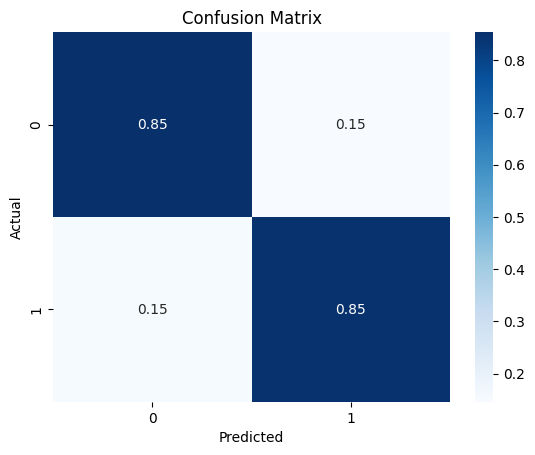

In [20]:
conf_matrix = pd.crosstab(test_labels, predictions, rownames=['Actual'], colnames=['Predicted'], normalize='index')
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix')
plt.show()

In [21]:
def test_review(review):
    review = remove_tags(review)
    review = ' '.join([word for word in review.split() if word not in stop_words])
    review = lemmatize_text(review)
    review_vectorized = vectorizer.transform([review])
    prediction = nb_classifier.predict(review_vectorized)
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    return sentiment

# Example Manual Test
manual_review = "The movie was absolutely fantastic! I loved the acting and the story."
print("Manual Review Sentiment:", test_review(manual_review))

Manual Review Sentiment: Positive


/tmp/ipykernel_8992/1798544214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_freq, palette='viridis')


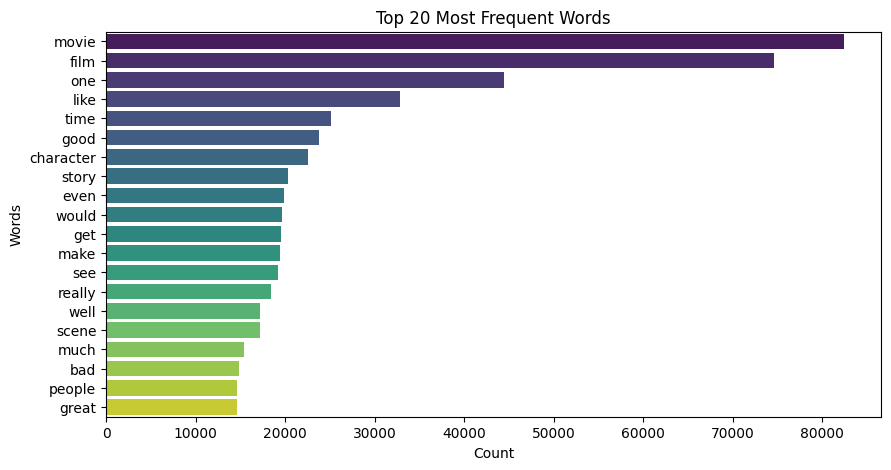

In [22]:
word_counts = np.asarray(x_train.sum(axis=0)).flatten()
words_freq = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts})
words_freq = words_freq.sort_values(by='count', ascending=False).head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=words_freq, palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()